<a href="https://colab.research.google.com/github/nj-ubu/1306370-Principles-of-Communications/blob/main/commuCode_CH03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

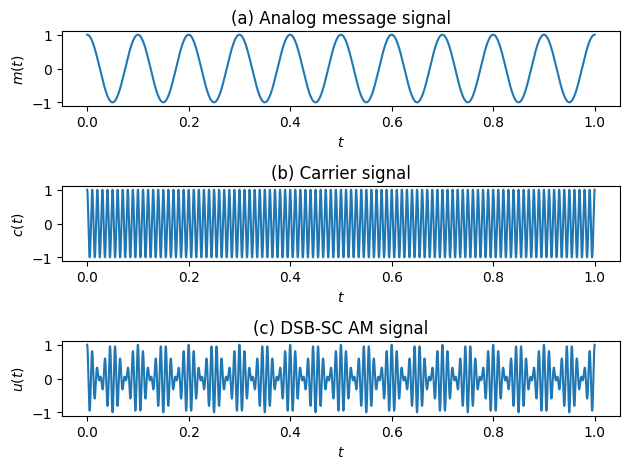

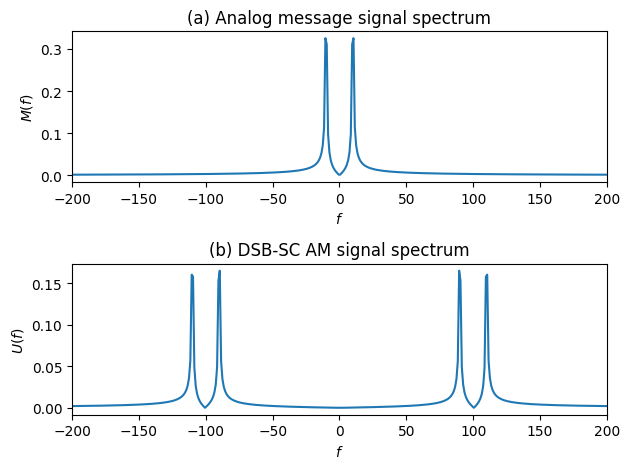

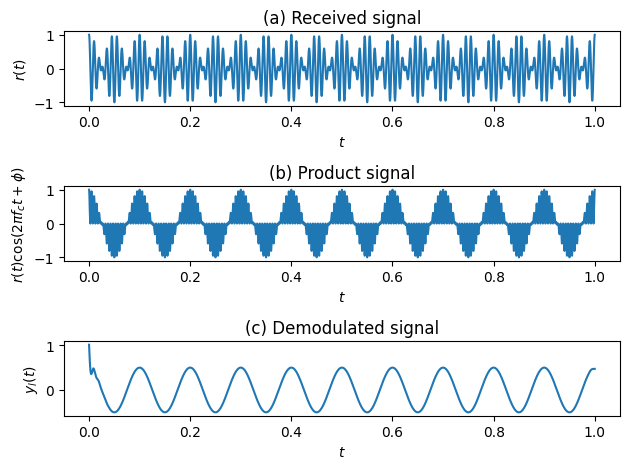

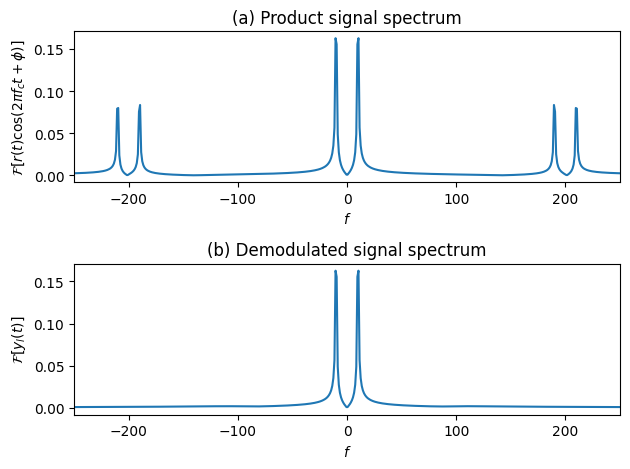

In [ ]:
#Fig:3-1--4 (DSB-SC AM)
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Parameters
duration = 1  # Duration of audio signal in seconds
sampling_rate = 10000  # Sampling rate in Hz
fm = 10  # Frequency of the message signal in Hz
fc = 100  # Carrier frequency in Hz
a = 1 # Amplitude of the message signal
Ac = 1  # Amplitude of the carrier signal

# Function to compute Fourier transform using numerical integration with np.trapz
def fourier_transform(signal, frequencies, time):
    X = np.zeros_like(frequencies, dtype=np.complex128)
    for i, freq in enumerate(frequencies):
        complex_exp = np.exp(-2j * np.pi * freq * time)
        X[i] = np.trapz(signal * complex_exp, time)
    return X

# Low-pass filtering (envelope detection)
def butter_lowpass_filter(data, cutoff_freq, fs, order=5):
    nyquist_freq = 0.5 * fs
    normal_cutoff = cutoff_freq / nyquist_freq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = filtfilt(b, a, data)
    return filtered_data

# Time array
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Define the analog message signal
msg_signal = a * np.cos(2 * np.pi * fm * t)

# Define the carrier signal
carrier_signal = Ac * np.cos(2 * np.pi * fc * t)

# Define the double-sideband suppressed-carrier AM signal
DSB_signal = msg_signal * carrier_signal

# Multiply the received signal by the carrier signal
received_signal = DSB_signal
prod_signal = received_signal * carrier_signal

# Pass the product signal through the lowpass filter
cutoff_freq = 100  # Set cutoff frequency for low-pass filter
order = 8  # Set filter order
demod_signal = butter_lowpass_filter(prod_signal, cutoff_freq, sampling_rate, order)

# Frequency range
freq_range = np.linspace(-sampling_rate / 2, sampling_rate / 2, len(t))

# Compute Fourier transform of the analog message signal
spectrum_msg = fourier_transform(msg_signal, freq_range, t)

# Compute Fourier transform of the DSB-SC AM signal
spectrum_DSB = fourier_transform(DSB_signal, freq_range, t)

# Compute Fourier transform of the product signal
spectrum_prod = fourier_transform(prod_signal, freq_range, t)

# Compute Fourier transform of the demodulated signal
spectrum_demod = fourier_transform(demod_signal, freq_range, t)

# Plot analog message, carrier and DSB-SC AM signals
plt.subplot(3, 1, 1)
plt.plot(t, msg_signal)
plt.title('(a) Analog message signal')
#plt.xlim([0, 0.1])
plt.xlabel('$t$')
plt.ylabel('$m(t)$')

plt.subplot(3, 1, 2)
plt.plot(t, carrier_signal)
plt.title('(b) Carrier signal')
#plt.xlim([0, 0.1])
plt.xlabel('$t$')
plt.ylabel('$c(t)$')

plt.subplot(3, 1, 3)
plt.plot(t, DSB_signal)
plt.title('(c) DSB-SC AM signal')
#plt.xlim([0, 0.1])
plt.xlabel('$t$')
plt.ylabel('$u(t)$')
plt.tight_layout()
plt.show()

# Plot analog message and DSB-SC AM signal spectrum
plt.subplot(2, 1, 1)
plt.plot(freq_range, np.abs(spectrum_msg))
plt.xlim([-fc-100, fc+100])
plt.title('(a) Analog message signal spectrum')
plt.xlabel('$f$')
plt.ylabel('$M(f)$')

plt.subplot(2, 1, 2)
plt.plot(freq_range, np.abs(spectrum_DSB))
plt.xlim([-fc-100, fc+100])
plt.title('(b) DSB-SC AM signal spectrum')
plt.xlabel('$f$')
plt.ylabel('$U(f)$')
plt.tight_layout()
plt.show()

# Plot received, product and demodulated signals
plt.subplot(3, 1, 1)
plt.plot(t, received_signal)
plt.title('(a) Received signal')
#plt.xlim([0, 0.1])
plt.xlabel('$t$')
plt.ylabel('$r(t)$')

plt.subplot(3, 1, 2)
plt.plot(t, prod_signal)
plt.title('(b) Product signal')
#plt.xlim([0, 0.1])
plt.xlabel('$t$')
plt.ylabel('$r(t)\cos(2\pi f_{c}t + \phi)$')

plt.subplot(3, 1, 3)
plt.plot(t, demod_signal)
plt.title('(c) Demodulated signal')
#plt.xlim([0, 0.1])
plt.xlabel('$t$')
plt.ylabel('$y_{l}(t)$')
plt.tight_layout()
plt.show()

# Plot product and demodulated signal spectrum
plt.subplot(2, 1, 1)
plt.plot(freq_range, np.abs(spectrum_prod))
plt.xlim([-fc-150, fc+150])
plt.title('(a) Product signal spectrum')
plt.xlabel('$f$')
plt.ylabel('$\mathcal{F}[r(t)\cos(2\pi f_{c}t + \phi)]$')

plt.subplot(2, 1, 2)
plt.plot(freq_range, np.abs(spectrum_demod))
plt.xlim([-fc-150, fc+150])
plt.title('(b) Demodulated signal spectrum')
plt.xlabel('$f$')
plt.ylabel('$\mathcal{F}[y_{l}(t)]$')
plt.tight_layout()
plt.show()

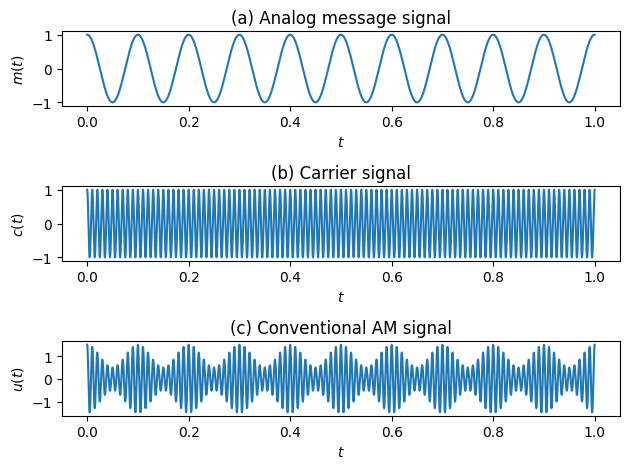

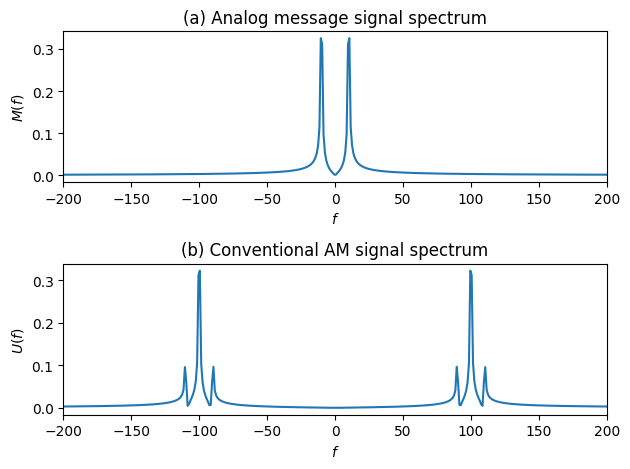

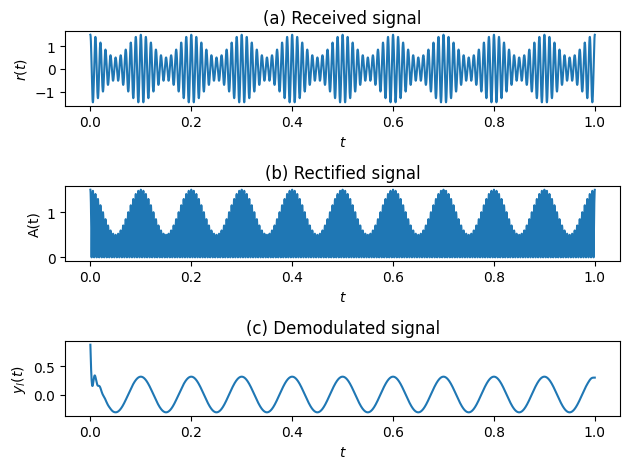

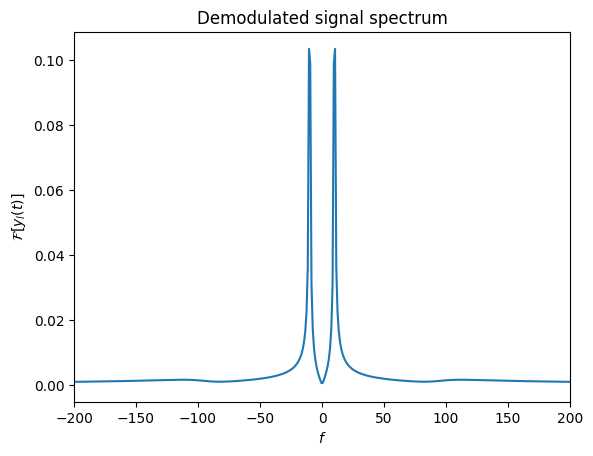

In [ ]:
#Fig:3-5--8 (conventional AM)
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Parameters
duration = 1  # Duration of audio signal in seconds
sampling_rate = 10000  # Sampling rate in Hz
fm = 10  # Frequency of the message signal in Hz
fc = 100  # Carrier frequency in Hz
a = 1 # Amplitude of the message signal
Ac = 1  # Amplitude of the carrier signal
inx = 0.5 # Modulation index

# Function to compute Fourier transform using numerical integration with np.trapz
def fourier_transform(signal, frequencies, time):
    X = np.zeros_like(frequencies, dtype=np.complex128)
    for i, freq in enumerate(frequencies):
        complex_exp = np.exp(-2j * np.pi * freq * time)
        X[i] = np.trapz(signal * complex_exp, time)
    return X

# Low-pass filtering (envelope detection)
def butter_lowpass_filter(data, cutoff_freq, fs, order=5):
    nyquist_freq = 0.5 * fs
    normal_cutoff = cutoff_freq / nyquist_freq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = filtfilt(b, a, data)
    return filtered_data

# Time array
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Define the analog message signal
msg_signal = a * np.cos(2 * np.pi * fm * t)
max_msg = max(msg_signal)
normal_msg = msg_signal / max_msg

# Define the carrier signal
carrier_signal = Ac * np.cos(2 * np.pi * fc * t)

# Define the conventional AM signal
am_signal = (1 + inx * normal_msg) * carrier_signal

# Rectify the received signal
received_signal = am_signal
rectified_signal = np.abs(received_signal)

# Use a transformer to remove the DC component (i.e., pass only AC component)
rectified_signal_ac = rectified_signal - np.mean(rectified_signal)

# Pass the rectified signal through the low-pass filter to recover the message signal
cutoff_freq = 100  # Set cutoff frequency for low-pass filter
order = 8  # Set filter order
demod_signal = butter_lowpass_filter(rectified_signal_ac, cutoff_freq, sampling_rate, order)

# Frequency range
freq_range = np.linspace(-sampling_rate / 2, sampling_rate / 2, len(t))

# Compute Fourier transform of the analog message signal
spectrum_msg = fourier_transform(msg_signal, freq_range, t)

# Compute Fourier transform of the conventional AM signal
spectrum_am = fourier_transform(am_signal, freq_range, t)

# Compute Fourier transform of the demodulated signal
spectrum_demod = fourier_transform(demod_signal, freq_range, t)

# Plot analog message, carrier and conventional AM signals
plt.subplot(3, 1, 1)
plt.plot(t, msg_signal)
plt.title('(a) Analog message signal')
#plt.xlim([0, 0.1])
plt.xlabel('$t$')
plt.ylabel('$m(t)$')

plt.subplot(3, 1, 2)
plt.plot(t, carrier_signal)
plt.title('(b) Carrier signal')
#plt.xlim([0, 0.1])
plt.xlabel('$t$')
plt.ylabel('$c(t)$')

plt.subplot(3, 1, 3)
plt.plot(t, am_signal)
plt.title('(c) Conventional AM signal')
#plt.xlim([0, 0.1])
plt.xlabel('$t$')
plt.ylabel('$u(t)$')
plt.tight_layout()
plt.show()

# Plot analog message and conventional AM signal spectrum
plt.subplot(2, 1, 1)
plt.plot(freq_range, np.abs(spectrum_msg))
plt.xlim([-fc-100, fc+100])
plt.title('(a) Analog message signal spectrum')
plt.xlabel('$f$')
plt.ylabel('$M(f)$')

plt.subplot(2, 1, 2)
plt.plot(freq_range, np.abs(spectrum_am))
plt.xlim([-fc-100, fc+100])
plt.title('(b) Conventional AM signal spectrum')
plt.xlabel('$f$')
plt.ylabel('$U(f)$')
plt.tight_layout()
plt.show()

# Plot received, rectified and demodulated signals
plt.subplot(3, 1, 1)
plt.plot(t, received_signal)
plt.title('(a) Received signal')
#plt.xlim([0, 0.1])
plt.xlabel('$t$')
plt.ylabel('$r(t)$')

plt.subplot(3, 1, 2)
plt.plot(t, rectified_signal)
plt.title('(b) Rectified signal')
#plt.xlim([0, 0.1])
plt.xlabel('$t$')
plt.ylabel('A(t)')

plt.subplot(3, 1, 3)
plt.plot(t, demod_signal)
plt.title('(c) Demodulated signal')
#plt.xlim([0, 0.1])
plt.xlabel('$t$')
plt.ylabel('$y_{l}(t)$')
plt.tight_layout()
plt.show()

# Plot demodulated signal spectrum
plt.plot(freq_range, np.abs(spectrum_demod))
plt.xlim([-fc-100, fc+100])
plt.title('Demodulated signal spectrum')
plt.xlabel('$f$')
plt.ylabel('$\mathcal{F}[y_{l}(t)]$')
plt.show()

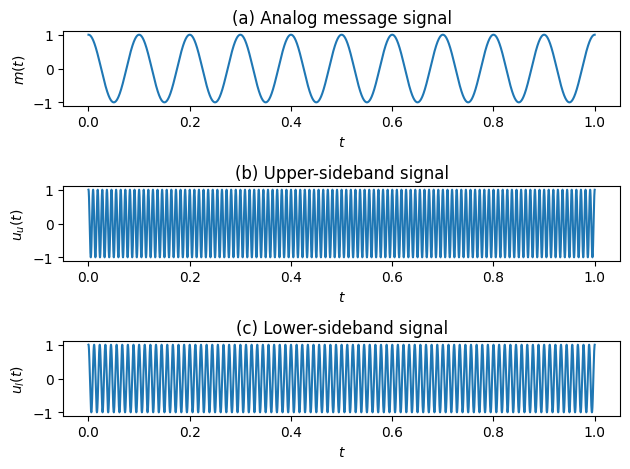

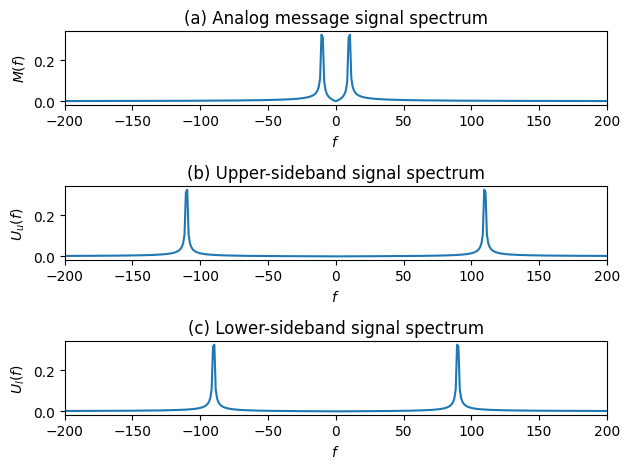

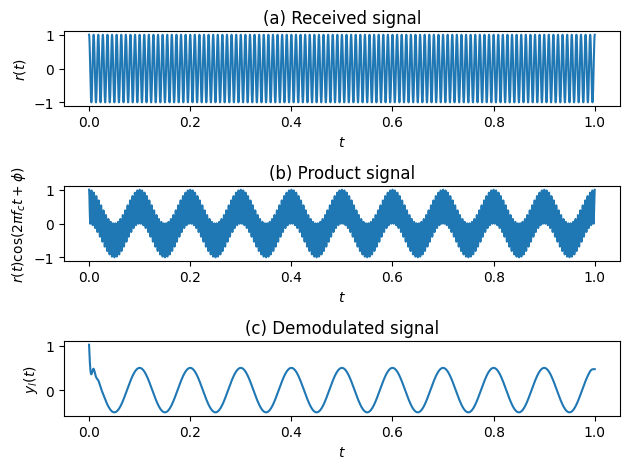

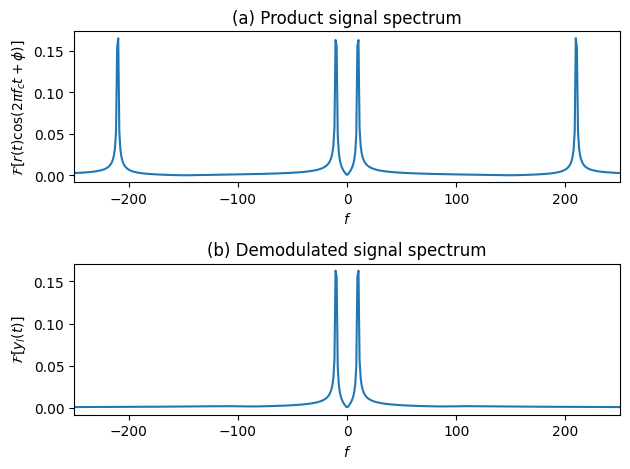

In [ ]:
#Fig:3-9--12 (SSB-AM)
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, hilbert

# Parameters
duration = 1  # Duration of audio signal in seconds
sampling_rate = 10000  # Sampling rate in Hz
fm = 10  # Frequency of the message signal in Hz
fc = 100  # Carrier frequency in Hz
a = 1 # Amplitude of the message signal
Ac = 1  # Amplitude of the carrier signal

# Function to compute Fourier transform using numerical integration with np.trapz
def fourier_transform(signal, frequencies, time):
    X = np.zeros_like(frequencies, dtype=np.complex128)
    for i, freq in enumerate(frequencies):
        complex_exp = np.exp(-2j * np.pi * freq * time)
        X[i] = np.trapz(signal * complex_exp, time)
    return X

# Low-pass filtering (envelope detection)
def butter_lowpass_filter(data, cutoff_freq, fs, order=5):
    nyquist_freq = 0.5 * fs
    normal_cutoff = cutoff_freq / nyquist_freq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = filtfilt(b, a, data)
    return filtered_data

# Time array
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Define the analog message signal
msg_signal = a * np.cos(2 * np.pi * fm * t)

# Define the carrier signal
carrier_signal = Ac * np.cos(2 * np.pi * fc * t)

# Define the Hilbert transform of message signal
#msg_h_signal = hilbert(msg_signal)
msg_h_signal = a * np.sin(2 * np.pi * fm * t)

# Define the SSB AM signal
ssb_u_signal = (msg_signal * carrier_signal) - (Ac * msg_h_signal * np.sin(2 * np.pi * fc * t))
#ssb_u_signal = Ac * np.cos(2 * np.pi * (fc + fm) * t)
ssb_l_signal = (msg_signal * carrier_signal) + (Ac * msg_h_signal * np.sin(2 * np.pi * fc * t))
#ssb_l_signal = Ac * np.cos(2 * np.pi * (fc - fm) * t)

# Multiply the received signal by the carrier signal
received_signal = ssb_u_signal
prod_signal = received_signal * carrier_signal

# Pass the product signal through the lowpass filter
cutoff_freq = 100  # Set cutoff frequency for low-pass filter
order = 8  # Set filter order
demod_signal = butter_lowpass_filter(prod_signal, cutoff_freq, sampling_rate, order)

# Frequency range
freq_range = np.linspace(-sampling_rate / 2, sampling_rate / 2, len(t))

# Compute Fourier transform of the analog message signal
spectrum_msg = fourier_transform(msg_signal, freq_range, t)

# Compute Fourier transform of the SSB AM signal
spectrum_ssb_u = fourier_transform(ssb_u_signal, freq_range, t)
spectrum_ssb_l = fourier_transform(ssb_l_signal, freq_range, t)

# Compute Fourier transform of the product signal
spectrum_prod = fourier_transform(prod_signal, freq_range, t)

# Compute Fourier transform of the demodulated signal
spectrum_demod = fourier_transform(demod_signal, freq_range, t)

# Plot analog message and SSB AM signals
plt.subplot(3, 1, 1)
plt.plot(t, msg_signal)
plt.title('(a) Analog message signal')
#plt.xlim([0, 0.1])
plt.xlabel('$t$')
plt.ylabel('$m(t)$')

plt.subplot(3, 1, 2)
plt.plot(t, ssb_u_signal)
plt.title('(b) Upper-sideband signal')
#plt.xlim([0, 0.1])
plt.xlabel('$t$')
plt.ylabel('$u_{u}(t)$')

plt.subplot(3, 1, 3)
plt.plot(t, ssb_l_signal)
plt.title('(c) Lower-sideband signal')
#plt.xlim([0, 0.1])
plt.xlabel('$t$')
plt.ylabel('$u_{l}(t)$')
plt.tight_layout()
plt.show()

# Plot analog message and SSB AM signal spectrum
plt.subplot(3, 1, 1)
plt.plot(freq_range, np.abs(spectrum_msg))
plt.xlim([-fc-100, fc+100])
plt.title('(a) Analog message signal spectrum')
plt.xlabel('$f$')
plt.ylabel('$M(f)$')

plt.subplot(3, 1, 2)
plt.plot(freq_range, np.abs(spectrum_ssb_u))
plt.xlim([-fc-100, fc+100])
plt.title('(b) Upper-sideband signal spectrum')
plt.xlabel('$f$')
plt.ylabel('$U_{u}(f)$')

plt.subplot(3, 1, 3)
plt.plot(freq_range, np.abs(spectrum_ssb_l))
plt.xlim([-fc-100, fc+100])
plt.title('(c) Lower-sideband signal spectrum')
plt.xlabel('$f$')
plt.ylabel('$U_{l}(f)$')
plt.tight_layout()
plt.show()

# Plot received, product and demodulated signals
plt.subplot(3, 1, 1)
plt.plot(t, received_signal)
plt.title('(a) Received signal')
#plt.xlim([0, 0.1])
plt.xlabel('$t$')
plt.ylabel('$r(t)$')

plt.subplot(3, 1, 2)
plt.plot(t, prod_signal)
plt.title('(b) Product signal')
#plt.xlim([0, 0.1])
plt.xlabel('$t$')
plt.ylabel('$r(t)\cos(2\pi f_{c}t + \phi)$')

plt.subplot(3, 1, 3)
plt.plot(t, demod_signal)
plt.title('(c) Demodulated signal')
#plt.xlim([0, 0.1])
plt.xlabel('$t$')
plt.ylabel('$y_{l}(t)$')
plt.tight_layout()
plt.show()

# Plot product and demodulated signal spectrum
plt.subplot(2, 1, 1)
plt.plot(freq_range, np.abs(spectrum_prod))
plt.xlim([-fc-150, fc+150])
plt.title('(a) Product signal spectrum')
plt.xlabel('$f$')
plt.ylabel('$\mathcal{F}[r(t)\cos(2\pi f_{c}t + \phi)]$')

plt.subplot(2, 1, 2)
plt.plot(freq_range, np.abs(spectrum_demod))
plt.xlim([-fc-150, fc+150])
plt.title('(b) Demodulated signal spectrum')
plt.xlabel('$f$')
plt.ylabel('$\mathcal{F}[y_{l}(t)]$')
plt.tight_layout()
plt.show()

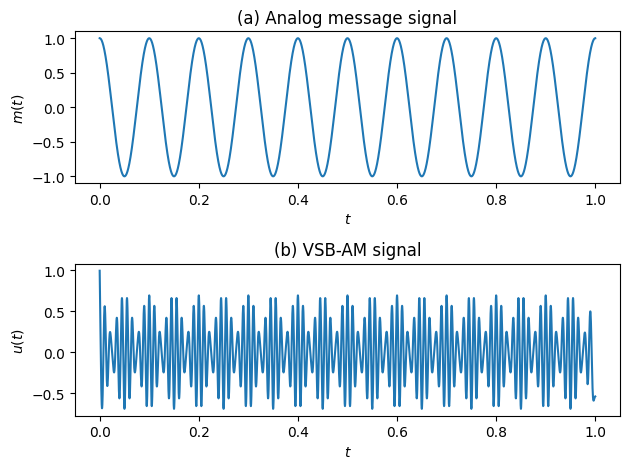

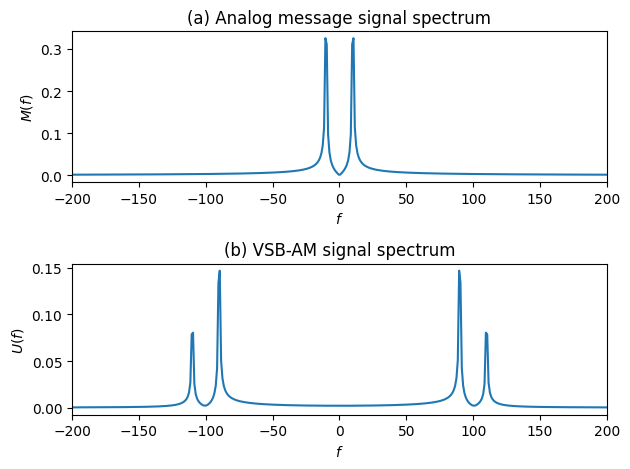

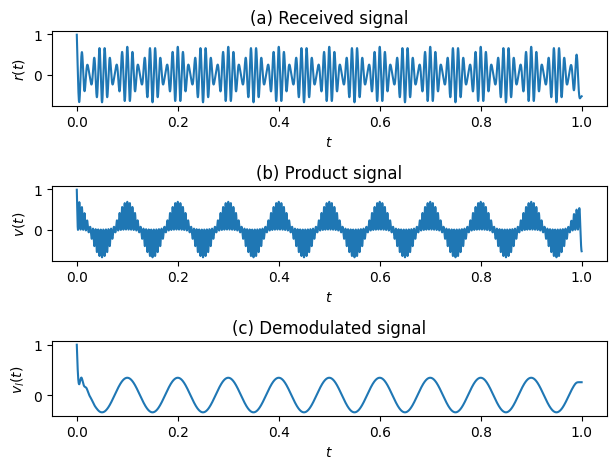

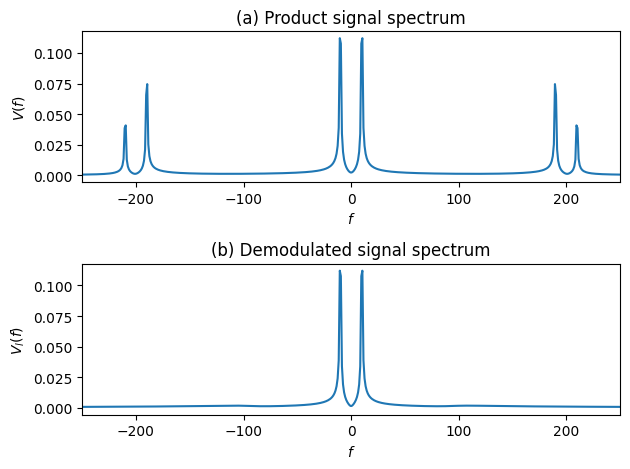

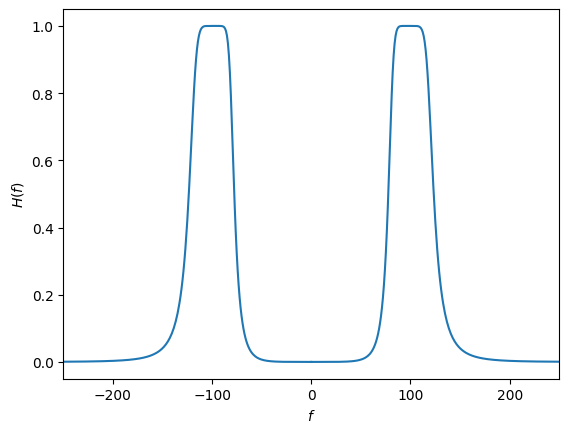

In [ ]:
#Fig:3-13--17 (VSB-AM)
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import butter, filtfilt, hilbert

# Parameters
duration = 1  # Duration of audio signal in seconds
sampling_rate = 10000  # Sampling rate in Hz
fm = 10  # Frequency of the message signal in Hz
fc = 100  # Carrier frequency in Hz
a = 1 # Amplitude of the message signal
Ac = 1  # Amplitude of the carrier signal
vsb_bandwidth = 20  # Bandwidth of the vestigial sideband in Hz

# Function to compute Fourier transform using numerical integration with np.trapz
def fourier_transform(signal, frequencies, time):
    X = np.zeros_like(frequencies, dtype=np.complex128)
    for i, freq in enumerate(frequencies):
        complex_exp = np.exp(-2j * np.pi * freq * time)
        X[i] = np.trapz(signal * complex_exp, time)
    return X

# Low-pass filtering (envelope detection)
def butter_lowpass_filter(data, cutoff_freq, fs, order=5):
    nyquist_freq = 0.5 * fs
    normal_cutoff = cutoff_freq / nyquist_freq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = filtfilt(b, a, data)
    return filtered_data

# Design a low-pass filter for VSB modulation
def vsb_filter(cutoff_freq, fs, order=5):
    nyquist_freq = 0.5 * fs
    normal_cutoff = cutoff_freq / nyquist_freq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# Apply the VSB filter
def apply_vsb_filter(data, vsb_bandwidth, fs, order=5):
    vsb_cutoff_freq = fc + (vsb_bandwidth / 2)  # Upper sideband cutoff frequency
    b, a = vsb_filter(vsb_cutoff_freq, fs, order)
    filtered_data = filtfilt(b, a, data)
    return filtered_data

# Time array
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Define the analog message signal
msg_signal = a * np.cos(2 * np.pi * fm * t)

# Define the carrier signal
carrier_signal = Ac * np.cos(2 * np.pi * fc * t)

# Define the VSB filter (e.g., a simple low-pass filter)
# cutoff_frequency = fc + (vsb_bandwidth / 2)  # Cutoff frequency for low-pass filter
# filter_order = 50  # Set filter order
# nyquist_rate = sampling_rate / 2
# b, a = butter(filter_order, cutoff_frequency/nyquist_rate, btype='low')

# Define the VSB-AM signal
#vsb_am_signal = np.convolve(msg_signal * carrier_signal, b, mode='same')
# vsb_cutoff_freq = fc + (vsb_bandwidth / 2)  # Cutoff frequency for VSB filter
# vsb_order = 50 # Set filter order for VSB filter
# vsb_am_signal = butter_lowpass_filter(msg_signal * carrier_signal, vsb_cutoff_freq, sampling_rate, vsb_order)
vsb_am_signal = apply_vsb_filter(msg_signal * carrier_signal, vsb_bandwidth, sampling_rate)

# Multiply the received signal by the carrier signal
received_signal = vsb_am_signal
prod_signal = received_signal * carrier_signal

# Pass the product signal through the lowpass filter
cutoff_freq = 100  # Set cutoff frequency for low-pass filter
order = 8  # Set filter order
demod_signal = butter_lowpass_filter(prod_signal, cutoff_freq, sampling_rate, order)

# Frequency range
freq_range = np.linspace(-sampling_rate / 2, sampling_rate / 2, len(t))

# Compute Fourier transform of the analog message signal
spectrum_msg = fourier_transform(msg_signal, freq_range, t)

# Compute Fourier transform of the VSB AM signal
spectrum_vsb_am = fourier_transform(vsb_am_signal, freq_range, t)

# Compute Fourier transform of the product signal
spectrum_prod = fourier_transform(prod_signal, freq_range, t)

# Compute Fourier transform of the demodulated signal
spectrum_demod = fourier_transform(demod_signal, freq_range, t)

# Define VSB filter
fs_vsb = 1000
passband_start = fc - vsb_bandwidth
passband_stop = fc + vsb_bandwidth
b, a = signal.butter(4, [passband_start, passband_stop], btype='bandpass', fs=fs_vsb)

# Compute the frequency response of the filter
w, h = signal.freqz(b, a)

# Plot analog message and VSB AM signals
plt.subplot(2, 1, 1)
plt.plot(t, msg_signal)
plt.title('(a) Analog message signal')
#plt.xlim([0, 0.1])
plt.xlabel('$t$')
plt.ylabel('$m(t)$')

plt.subplot(2, 1, 2)
plt.plot(t, vsb_am_signal)
plt.title('(b) VSB-AM signal')
#plt.xlim([0, 0.1])
plt.xlabel('$t$')
plt.ylabel('$u(t)$')
plt.tight_layout()
plt.show()

# Plot analog message and VSB AM signal spectrum
plt.subplot(2, 1, 1)
plt.plot(freq_range, np.abs(spectrum_msg))
plt.xlim([-fc-100, fc+100])
plt.title('(a) Analog message signal spectrum')
plt.xlabel('$f$')
plt.ylabel('$M(f)$')

plt.subplot(2, 1, 2)
plt.plot(freq_range, np.abs(spectrum_vsb_am))
plt.xlim([-fc-100, fc+100])
plt.title('(b) VSB-AM signal spectrum')
plt.xlabel('$f$')
plt.ylabel('$U(f)$')
plt.tight_layout()
plt.show()

# Plot received, product and demodulated signals
plt.subplot(3, 1, 1)
plt.plot(t, received_signal)
plt.title('(a) Received signal')
#plt.xlim([0, 0.1])
plt.xlabel('$t$')
plt.ylabel('$r(t)$')

plt.subplot(3, 1, 2)
plt.plot(t, prod_signal)
plt.title('(b) Product signal')
#plt.xlim([0, 0.1])
plt.xlabel('$t$')
plt.ylabel('$v(t)$')

plt.subplot(3, 1, 3)
plt.plot(t, demod_signal)
plt.title('(c) Demodulated signal')
#plt.xlim([0, 0.1])
plt.xlabel('$t$')
plt.ylabel('$v_{l}(t)$')
plt.tight_layout()
plt.show()

# Plot product and demodulated signal spectrum
plt.subplot(2, 1, 1)
plt.plot(freq_range, np.abs(spectrum_prod))
plt.xlim([-fc-150, fc+150])
plt.title('(a) Product signal spectrum')
plt.xlabel('$f$')
plt.ylabel('$V(f)$')

plt.subplot(2, 1, 2)
plt.plot(freq_range, np.abs(spectrum_demod))
plt.xlim([-fc-150, fc+150])
plt.title('(b) Demodulated signal spectrum')
plt.xlabel('$f$')
plt.ylabel('$V_{l}(f)$')
plt.tight_layout()
plt.show()

# Plot the frequency response of VSB filter
plt.plot(0.5 * fs_vsb * w / np.pi, np.abs(h), color = '#1f77b4')
plt.plot(-0.5 * fs_vsb * w / np.pi, np.abs(h), color = '#1f77b4')
plt.xlabel('$f$')
plt.ylabel('$H(f)$')
plt.xlim([-250, 250])
plt.show()

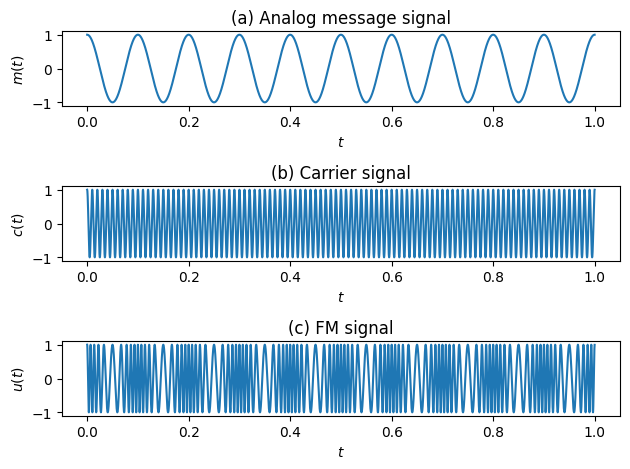

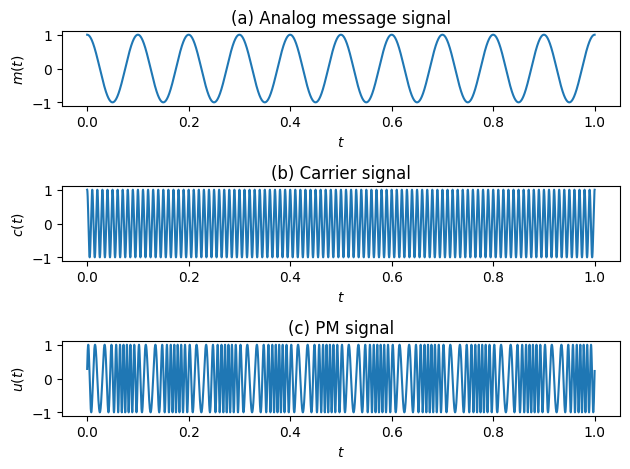

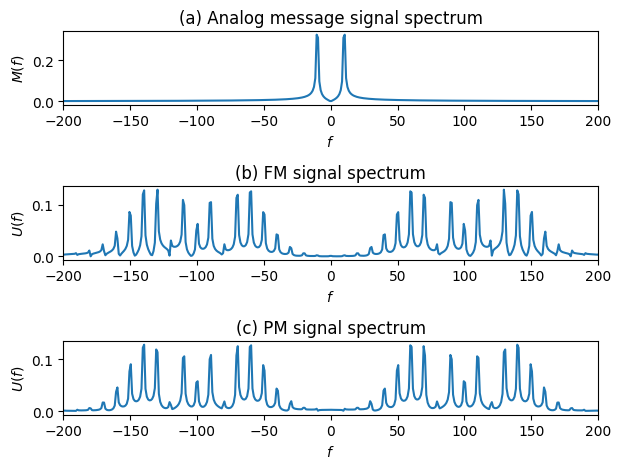

In [ ]:
#Fig:3-18--20 (FM/PM)
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Parameters
duration = 1  # Duration of audio signal in seconds
sampling_rate = 10000  # Sampling rate in Hz
fm = 10  # Frequency of the message signal in Hz
fc = 100  # Carrier frequency in Hz
a = 1 # Amplitude of the message signal
Ac = 1  # Amplitude of the carrier signal

# Function to compute Fourier transform using numerical integration with np.trapz
def fourier_transform(signal, frequencies, time):
    X = np.zeros_like(frequencies, dtype=np.complex128)
    for i, freq in enumerate(frequencies):
        complex_exp = np.exp(-2j * np.pi * freq * time)
        X[i] = np.trapz(signal * complex_exp, time)
    return X

# # Low-pass filtering (envelope detection)
# def butter_lowpass_filter(data, cutoff_freq, fs, order=5):
#     nyquist_freq = 0.5 * fs
#     normal_cutoff = cutoff_freq / nyquist_freq
#     b, a = butter(order, normal_cutoff, btype='low', analog=False)
#     filtered_data = filtfilt(b, a, data)
#     return filtered_data

# Time array
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Define the analog message signal
msg_signal = a * np.cos(2 * np.pi * fm * t)

# Define the carrier signal
carrier_signal = Ac * np.cos(2 * np.pi * fc * t)

# Define the FM signal
kf = 50 # Frequency deviation constant
bf = kf * a / fm  # Modulation index
FM_signal = Ac * np.cos(2 * np.pi * fc * t + bf * np.sin(2 * np.pi * fm * t))

# Define the PM signal
kp = 5 # Frequency deviation constant
bp = kp * a  # Modulation index
PM_signal = Ac * np.cos(2 * np.pi * fc * t + bp * np.cos(2 * np.pi * fm * t))

# # Multiply the received signal by the carrier signal
# received_signal = DSB_signal
# prod_signal = received_signal * carrier_signal

# # Pass the product signal through the lowpass filter
# cutoff_freq = 100  # Set cutoff frequency for low-pass filter
# order = 8  # Set filter order
# demod_signal = butter_lowpass_filter(prod_signal, cutoff_freq, sampling_rate, order)

# Frequency range
freq_range = np.linspace(-sampling_rate / 2, sampling_rate / 2, len(t))

# Compute Fourier transform of the analog message signal
spectrum_msg = fourier_transform(msg_signal, freq_range, t)

# Compute Fourier transform of the FM signal
spectrum_FM = fourier_transform(FM_signal, freq_range, t)

# Compute Fourier transform of the PM signal
spectrum_PM = fourier_transform(PM_signal, freq_range, t)

# # Compute Fourier transform of the product signal
# spectrum_prod = fourier_transform(prod_signal, freq_range, t)

# # Compute Fourier transform of the demodulated signal
# spectrum_demod = fourier_transform(demod_signal, freq_range, t)

# Plot analog message, carrier and FM signals
plt.subplot(3, 1, 1)
plt.plot(t, msg_signal)
plt.title('(a) Analog message signal')
#plt.xlim([0, 0.1])
plt.xlabel('$t$')
plt.ylabel('$m(t)$')

plt.subplot(3, 1, 2)
plt.plot(t, carrier_signal)
plt.title('(b) Carrier signal')
#plt.xlim([0, 0.1])
plt.xlabel('$t$')
plt.ylabel('$c(t)$')

plt.subplot(3, 1, 3)
plt.plot(t, FM_signal)
plt.title('(c) FM signal')
#plt.xlim([0, 0.1])
plt.xlabel('$t$')
plt.ylabel('$u(t)$')
plt.tight_layout()
plt.show()

# Plot analog message, carrier and PM signals
plt.subplot(3, 1, 1)
plt.plot(t, msg_signal)
plt.title('(a) Analog message signal')
#plt.xlim([0, 0.1])
plt.xlabel('$t$')
plt.ylabel('$m(t)$')

plt.subplot(3, 1, 2)
plt.plot(t, carrier_signal)
plt.title('(b) Carrier signal')
#plt.xlim([0, 0.1])
plt.xlabel('$t$')
plt.ylabel('$c(t)$')

plt.subplot(3, 1, 3)
plt.plot(t, PM_signal)
plt.title('(c) PM signal')
#plt.xlim([0, 0.1])
plt.xlabel('$t$')
plt.ylabel('$u(t)$')
plt.tight_layout()
plt.show()

# Plot analog message and FM/PM signal spectrum
plt.subplot(3, 1, 1)
plt.plot(freq_range, np.abs(spectrum_msg))
plt.xlim([-fc-100, fc+100])
plt.title('(a) Analog message signal spectrum')
plt.xlabel('$f$')
plt.ylabel('$M(f)$')

plt.subplot(3, 1, 2)
plt.plot(freq_range, np.abs(spectrum_FM))
plt.xlim([-fc-100, fc+100])
plt.title('(b) FM signal spectrum')
plt.xlabel('$f$')
plt.ylabel('$U(f)$')
plt.tight_layout()

plt.subplot(3, 1, 3)
plt.plot(freq_range, np.abs(spectrum_PM))
plt.xlim([-fc-100, fc+100])
plt.title('(c) PM signal spectrum')
plt.xlabel('$f$')
plt.ylabel('$U(f)$')
plt.tight_layout()
plt.show()

# # Plot received, product and demodulated signals
# plt.subplot(3, 1, 1)
# plt.plot(t, received_signal)
# plt.title('(a) Received signal')
# #plt.xlim([0, 0.1])
# plt.xlabel('$t$')
# plt.ylabel('$r(t)$')

# plt.subplot(3, 1, 2)
# plt.plot(t, prod_signal)
# plt.title('(b) Product signal')
# #plt.xlim([0, 0.1])
# plt.xlabel('$t$')
# plt.ylabel('$r(t)\cos(2\pi f_{c}t + \phi)$')

# plt.subplot(3, 1, 3)
# plt.plot(t, demod_signal)
# plt.title('(c) Demodulated signal')
# #plt.xlim([0, 0.1])
# plt.xlabel('$t$')
# plt.ylabel('$y_{l}(t)$')
# plt.tight_layout()
# plt.show()

# # Plot product and demodulated signal spectrum
# plt.subplot(2, 1, 1)
# plt.plot(freq_range, np.abs(spectrum_prod))
# plt.xlim([-fc-150, fc+150])
# plt.title('(a) Product signal spectrum')
# plt.xlabel('$f$')
# plt.ylabel('$\mathcal{F}[r(t)\cos(2\pi f_{c}t + \phi)]$')

# plt.subplot(2, 1, 2)
# plt.plot(freq_range, np.abs(spectrum_demod))
# plt.xlim([-fc-150, fc+150])
# plt.title('(b) Demodulated signal spectrum')
# plt.xlabel('$f$')
# plt.ylabel('$\mathcal{F}[y_{l}(t)]$')
# plt.tight_layout()
# plt.show()

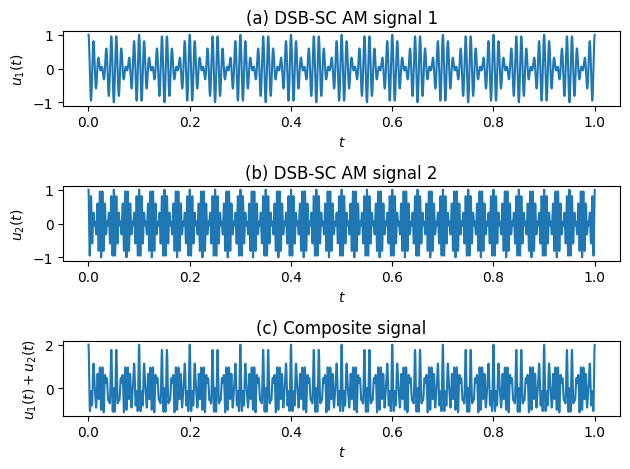

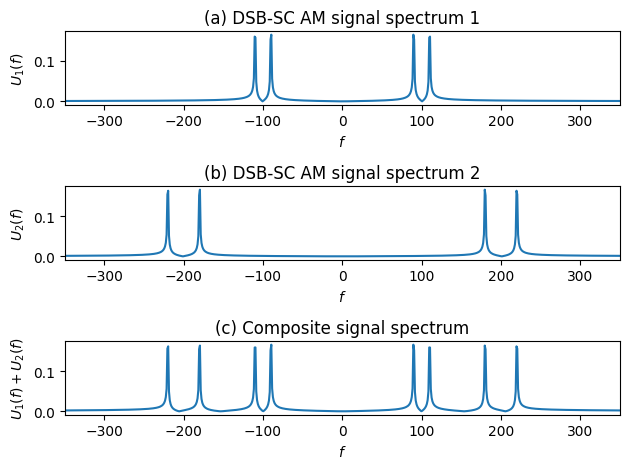

In [ ]:
#Fig:3-21--22 (FDM)
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Parameters
duration = 1  # Duration of audio signal in seconds
sampling_rate = 10000  # Sampling rate in Hz
fm = 10  # Frequency of the message signal in Hz
fc = 100  # Carrier frequency in Hz
a = 1 # Amplitude of the message signal
Ac = 1  # Amplitude of the carrier signal

# Function to compute Fourier transform using numerical integration with np.trapz
def fourier_transform(signal, frequencies, time):
    X = np.zeros_like(frequencies, dtype=np.complex128)
    for i, freq in enumerate(frequencies):
        complex_exp = np.exp(-2j * np.pi * freq * time)
        X[i] = np.trapz(signal * complex_exp, time)
    return X

# Low-pass filtering (envelope detection)
def butter_lowpass_filter(data, cutoff_freq, fs, order=5):
    nyquist_freq = 0.5 * fs
    normal_cutoff = cutoff_freq / nyquist_freq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = filtfilt(b, a, data)
    return filtered_data

# Time array
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Define the analog message signal
msg_signal1 = a * np.cos(2 * np.pi * fm * t)
msg_signal2 = a * np.cos(2 * np.pi * 2*fm * t)

# Define the carrier signal
carrier_signal1 = Ac * np.cos(2 * np.pi * fc * t)
carrier_signal2 = Ac * np.cos(2 * np.pi * 2*fc * t)

# Define the double-sideband suppressed-carrier AM signal
DSB_signal1 = msg_signal1 * carrier_signal1
DSB_signal2 = msg_signal2 * carrier_signal2

# Combine the modulated signals
composite_signal = DSB_signal1 + DSB_signal2

# Frequency range
freq_range = np.linspace(-sampling_rate / 2, sampling_rate / 2, len(t))

# Compute Fourier transform of the DSB-SC AM signal
spectrum_DSB1 = fourier_transform(DSB_signal1, freq_range, t)
spectrum_DSB2 = fourier_transform(DSB_signal2, freq_range, t)

# Compute Fourier transform of the composite signal
spectrum_composite = fourier_transform(composite_signal, freq_range, t)

# Plot DSB-SC AM and composite signals
plt.subplot(3, 1, 1)
plt.plot(t, DSB_signal1)
plt.title('(a) DSB-SC AM signal 1')
#plt.xlim([0, 0.1])
plt.xlabel('$t$')
plt.ylabel('$u_{1}(t)$')

plt.subplot(3, 1, 2)
plt.plot(t, DSB_signal2)
plt.title('(b) DSB-SC AM signal 2')
#plt.xlim([0, 0.1])
plt.xlabel('$t$')
plt.ylabel('$u_{2}(t)$')

plt.subplot(3, 1, 3)
plt.plot(t, composite_signal)
plt.title('(c) Composite signal')
#plt.xlim([0, 0.1])
plt.xlabel('$t$')
plt.ylabel('$u_{1}(t) + u_{2}(t)$')
plt.tight_layout()
plt.show()

# Plot DSB-SC AM and composite signal spectrum
plt.subplot(3, 1, 1)
plt.plot(freq_range, np.abs(spectrum_DSB1))
plt.xlim([-fc-250, fc+250])
plt.title('(a) DSB-SC AM signal spectrum 1')
plt.xlabel('$f$')
plt.ylabel('$U_{1}(f)$')

plt.subplot(3, 1, 2)
plt.plot(freq_range, np.abs(spectrum_DSB2))
plt.xlim([-fc-250, fc+250])
plt.title('(b) DSB-SC AM signal spectrum 2')
plt.xlabel('$f$')
plt.ylabel('$U_{2}(f)$')

plt.subplot(3, 1, 3)
plt.plot(freq_range, np.abs(spectrum_composite))
plt.xlim([-fc-250, fc+250])
plt.title('(c) Composite signal spectrum')
plt.xlabel('$f$')
plt.ylabel('$U_{1}(f) + U_{2}(f)$')
plt.tight_layout()
plt.show()